# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location `~/scikit_learn_data/...`
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape:', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape: (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

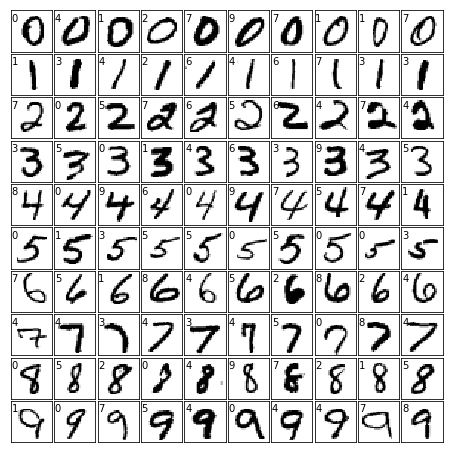

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    # Adjust figure size and subplots for better presentation
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # Initiate an empty 100*784 matrix
    example = np.zeros(mini_train_data[:100,:].shape)
    # Loop through digit 0 to 9 and find top 10 examples for each digit from mini_train_data 
    for digit in range(10):
        example[digit*10:(digit+1)*10,:] = mini_train_data[np.where(mini_train_labels == str(digit))][0:10,:]
    
    for i in range(num_examples**2):  
        # Convert the feature columns from a array of 1D with length 784 to a 28 x 28 array (2D matrix)
        pixels = example[i,:]
        pixels = np.array(pixels).reshape((28,28))
        
        # Add subplot to display the image based on the 2D matrix
        ax = fig.add_subplot(num_examples, num_examples, i + 1, xticks=[], yticks=[])
        ax.imshow(pixels, cmap=plt.cm.binary, interpolation='nearest')
        
        # label the image with the target value
        ax.text(0, 7, str(mini_train_labels[i]))    

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        # Create K-Nearest-Neighbors model with k = i
        # Fit model using mini train data
        # Test model using dev data
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(mini_train_data, mini_train_labels)
        predicted_labels = model.predict(dev_data)
        
        # Calculate model accuracy on dev data
        correct, total = 0, 0
        for pred, label in zip(predicted_labels, dev_labels):
            if pred == label: correct += 1
            total += 1
        print('For k =', i)
        print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))
        
        if i == 1:
            print('Clasification report for k = 1:\n', classification_report(dev_labels, predicted_labels))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For k = 1
total: 1000  correct: 884  accuracy: 0.884 

Clasification report for k = 1:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

For k = 3
total: 1000  correct: 876  accuracy: 0.876 

For k = 5
total: 1000  correct: 882  accuracy: 0.882 

For k = 7
total: 1000  correct: 877  accura

> **ANSWER**: based on the classification report for k=1, digit 8 is the most difficult digit, as it has a low precision and the lowest recall which gives the lowest F1 score among all digits. 


(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for size in train_sizes:
        # Create train data set according to the input training set size
        p3_train_data, p3_train_labels = train_data[:size], train_labels[:size]
        
        # Create K-Nearest-Neighbors model with k = 1
        # Fit model using p3_train_data 
        # Test model accuracy using dev data
        # Clock the time before and after prediction to calculate the amount of time needed for prediction
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(p3_train_data, p3_train_labels)
        t1 = time.time()
        predicted_labels = model.predict(dev_data)
        t2 = time.time()
        
        # Calculate model accuracy on dev data
        correct, total = 0, 0
        for pred, label in zip(predicted_labels, dev_labels):
            if pred == label: correct += 1
            total += 1
        accuracy = 1.0*correct/total
        accuracies.append(accuracy)
        
        print('For training data size =', size)
        print('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, accuracy))
        print('Time needed for prediction (in seconds): %.2f \n' %(t2-t1))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

For training data size = 100
total: 1000  correct: 702  accuracy: 0.70
Time needed for prediction (in seconds): 0.10 

For training data size = 200
total: 1000  correct: 791  accuracy: 0.79
Time needed for prediction (in seconds): 0.19 

For training data size = 400
total: 1000  correct: 811  accuracy: 0.81
Time needed for prediction (in seconds): 0.39 

For training data size = 800
total: 1000  correct: 866  accuracy: 0.87
Time needed for prediction (in seconds): 0.85 

For training data size = 1600
total: 1000  correct: 905  accuracy: 0.91
Time needed for prediction (in seconds): 1.65 

For training data size = 3200
total: 1000  correct: 927  accuracy: 0.93
Time needed for prediction (in seconds): 3.12 

For training data size = 6400
total: 1000  correct: 939  accuracy: 0.94
Time needed for prediction (in seconds): 6.40 

For training data size = 12800
total: 1000  correct: 952  accuracy: 0.95
Time needed for prediction (in seconds): 12.78 

For training data size = 25000
total: 1000

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4():

### STUDENT START ###
    # Fit a linear regression model to predict accuracy from training size
    x = np.array(train_sizes).reshape((-1,1))
    y = np.array(accuracies)
    p4_model = LinearRegression().fit(x, y)
    
    # Print the model coefficient and intercept
    print('Slope coefficient:', p4_model.coef_)
    print('Intercept:', p4_model.intercept_)
    
    # Predict the accuracy for data size = 60000
    n = [60000]
    pred_size = np.array(n).reshape((-1,1))
    y_pred = p4_model.predict(pred_size)
    print('Predicted accuracy for size = 60000 is', y_pred)

### STUDENT END ###

P4()

Slope coefficient: [6.83806142e-06]
Intercept: 0.8344086553721631
Predicted accuracy for size = 60000 is [1.24469234]


> **ANSWER**: The predicted accuracy is wrong as it is greater than 1. The linear regression model implicitly assumes that the accuracy will increase with train size without a lower or upper limit. However, it is known that accuracy could only fall between 0 and 1. Therefore, instead of growing infinitely, the accuracy (y in the regression model) should plateau close to 1 as data size increases to a certain point. I think applying logit transformation to the accuracy and fitting the train data sizes with the transformed accuracy could improve the prediction and make it more reasonable. 


(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix for 1-NN:
 [[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

The following examples of digit 4 are predicted as 9.


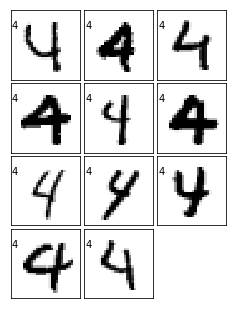

In [7]:
def P5():

### STUDENT START ###
    # Create K-Nearest-Neighbors model with k = 1
    # Fit model using mini train data
    # Test model using dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    predicted_labels = model.predict(dev_data)
        
    # Output a confusion matrix for the dev data
    print('Confusion matrix for 1-NN:\n', confusion_matrix(dev_labels, predicted_labels))
    
    # Display examples of mistaking 4 as 9 
    # Adjust figure size and subplots for better presentation
    fig = plt.figure(figsize=(3, 4))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # Pick out those digit 4s that are predicted as 9 by our model
    wrong_example = dev_data[(predicted_labels=='9')&(dev_labels=='4'),:]
    
    print("\nThe following examples of digit 4 are predicted as 9.")
    for i in range(11):
        # Convert the feature columns from a array of 1D with length 784 to a 28 x 28 array (2D matrix)
        pixels = wrong_example[i,:]
        pixels = np.array(pixels).reshape((28,28))
        
        # Add subplot to display the image based on the 2D matrix
        ax = fig.add_subplot(4, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(pixels, cmap=plt.cm.binary, interpolation='nearest')
        
        # label the image with the target value
        ax.text(0, 7, '4') 
    
### STUDENT END ###

P5()

> **ANSWER**: Based on the confusion matrix, the most confused pair is 4 and 9. There are 11 instances where true value is 4 but is predicted as 9. 

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
import math

# Define a Gaussian function to calculate the weight based on distance to the relevant pixel
def Gaussian(x, mu, sig):
    return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Define a function to preprocess dataset using Gaussian blur
def GetSmoothedValue(data, sigma=1):
    # Initiate an empty array with the same shape as the input data set
    smoothed_data = np.zeros(data.shape)
    rows, cols = data.shape

    # There are two types of neighbors:
    # Diagonal neighbors: distance = (1^2 + 1^2)^0.5
    # Cardinal neighbors: distance = 1
    diag_distance = (1**2*2)**.5
    card_distance = 1
    self_distance = 0
    diag_weight = Gaussian(diag_distance, 0, sigma)
    card_weight = Gaussian(card_distance, 0, sigma)
    self_weight = Gaussian(self_distance, 0, sigma)

    # Loop through all the data points in training data set to perform Gaussian blurring
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            # Gaussian blurring on the top left, top right, bottom left and bottom left corners
            if i == 0 and j == 0:
                smoothed_data[i][j] = diag_weight * data[1][1] \
                                    + card_weight * (data[0][1] + data[1][0]) \
                                    + self_weight * data[i][j]
            elif i == 0 and j == (cols-1):
                smoothed_data[i][j] = diag_weight * data[1][cols-2] \
                                    + card_weight * (data[0][cols-2] + data[1][cols-1]) \
                                    + self_weight * data[i][j]
            elif i == (rows-1) and j == 0:
                smoothed_data[i][j] = diag_weight * data[rows-2][1] \
                                    + card_weight * (data[rows-2][0] + data[rows-1][1]) + data[i][j] \
                                    + self_weight * data[i][j]
            elif i == rows-1 and j == cols-1:
                smoothed_data[i][j] = diag_weight * data[rows-2][cols-2] \
                                    + card_weight * (data[rows-2][cols-1] + data[rows-1][cols-2]) \
                                    + self_weight * data[i][j]
            # Gaussian blurring on top row, bottom row, left-most column, and right-most column
            elif i == 0 and j > 0 and j < cols-1:
                smoothed_data[i][j] = diag_weight * (data[i+1][j-1] + data[i+1][j+1]) \
                                    + card_weight * (data[i][j-1] + data[i][j+1] + data[i+1][j]) \
                                    + self_weight * data[i][j]
            elif i == rows-1 and j > 0 and j < cols-1:
                smoothed_data[i][j] = diag_weight * (data[i-1][j-1] + data[i-1][j+1]) \
                                    + card_weight * (data[i-1][j] + data[i][j-1] + data[i][j+1]) \
                                    + self_weight * data[i][j]
            elif i > 0 and i < rows-1 and j == 0:
                smoothed_data[i][j] = diag_weight * (data[i-1][j+1] + data[i+1][j+1]) \
                                    + card_weight * (data[i-1][j] + data[i][j+1] + data[i+1][j]) \
                                    + self_weight * data[i][j]
            elif i > 0 and i < rows-1 and j == cols-1:
                smoothed_data[i][j] = diag_weight * (data[i-1][j-1] + data[i+1][j-1]) \
                                    + card_weight * (data[i-1][j] + data[i][j-1] + data[i+1][j]) \
                                    + self_weight * data[i][j]
            # Gaussian blurring on all the other points
            else:
                smoothed_data[i][j] = diag_weight * (data[i-1][j-1] + data[i-1][j+1] 
                                                    + data[i+1][j-1] + data[i+1][j+1]) \
                                    + card_weight * (data[i-1][j] + data[i][j-1]
                                               + data[i][j+1] + data[i+1][j]) \
                                    + self_weight * data[i][j]

    return smoothed_data

In [30]:
def P6():
    
### STUDENT START ###
    # Set different sigma values for blurring testing
    test_sigma = [.5, 1, 3]
                                                         
    # 1. Preprocess with training data only
    filtered_data = np.zeros(train_data.shape)
    print("Preprocess with training data only:\n")
    for s in test_sigma:
        for row in range(train_data.shape[0]):
            data_to_be_blur = train_data[row,:].reshape((28,28))
            filtered_data[row,:] = GetSmoothedValue(data_to_be_blur, sigma=s).reshape((1,784))

        # Create K-Nearest-Neighbors model with k = 1
        # Fit model using smoothed train data
        # Test model using dev data
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(filtered_data, train_labels)
        predicted_labels = model.predict(dev_data)
        
        # Calculate model accuracy on dev data
        correct, total = 0, 0
        for pred, label in zip(predicted_labels, dev_labels):
            if pred == label: correct += 1
            total += 1
        print('For k = 1,', "sigma =", s)
        print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))
        
### STUDENT END ###

P6()

Preprocess with training data only:

For k = 1, sigma = 0.5
total: 1000  correct: 971  accuracy: 0.971 

For k = 1, sigma = 1
total: 1000  correct: 913  accuracy: 0.913 

For k = 1, sigma = 3
total: 1000  correct: 974  accuracy: 0.974 



In [31]:
# Set different sigma values for blurring testing
test_sigma = [.5, 1, 3]
    
# 2. Preprocess with dev data only
filtered_data = np.zeros(dev_data.shape)
print("Preprocess with dev data only:\n")
for s in test_sigma:
    for row in range(dev_data.shape[0]):
        data_to_be_blur = dev_data[row,:].reshape((28,28))
        filtered_data[row,:] = GetSmoothedValue(data_to_be_blur, sigma=s).reshape((1,784))

    # Create K-Nearest-Neighbors model with k = 1
    # Fit model using train data
    # Test model using smoothed dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(filtered_data)

    # Calculate model accuracy on dev data
    correct, total = 0, 0
    for pred, label in zip(predicted_labels, dev_labels):
        if pred == label: correct += 1
        total += 1
    print('For k = 1,', "sigma =", s)
    print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))


Preprocess with dev data only:

For k = 1, sigma = 0.5
total: 1000  correct: 967  accuracy: 0.967 

For k = 1, sigma = 1
total: 1000  correct: 954  accuracy: 0.954 

For k = 1, sigma = 3
total: 1000  correct: 964  accuracy: 0.964 



In [32]:
# Set different sigma values for blurring testing
test_sigma = [.5, 1, 3]

# 3. Preprocess with training and dev data
filtered_data = np.zeros(train_data.shape)
filtered_data_d = np.zeros(dev_data.shape)
print("Preprocess with training and dev data:\n")
for s in test_sigma:
    for row in range(train_data.shape[0]):
            data_to_be_blur = train_data[row,:].reshape((28,28))
            filtered_data[row,:] = GetSmoothedValue(data_to_be_blur, sigma=s).reshape((1,784))
    
    for row_d in range(dev_data.shape[0]):
        data_to_be_blur = dev_data[row_d,:].reshape((28,28))
        filtered_data_d[row_d,:] = GetSmoothedValue(data_to_be_blur, sigma=s).reshape((1,784))

    # Create K-Nearest-Neighbors model with k = 1
    # Fit model using smoothed train data
    # Test model using smoothed dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(filtered_data, train_labels)
    predicted_labels = model.predict(filtered_data_d)

    # Calculate model accuracy on dev data
    correct, total = 0, 0
    for pred, label in zip(predicted_labels, dev_labels):
        if pred == label: correct += 1
        total += 1
    print('For k = 1,', "sigma =", s)
    print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))

Preprocess with training and dev data:

For k = 1, sigma = 0.5
total: 1000  correct: 972  accuracy: 0.972 

For k = 1, sigma = 1
total: 1000  correct: 978  accuracy: 0.978 

For k = 1, sigma = 3
total: 1000  correct: 978  accuracy: 0.978 



In [33]:
### Use scipy.ndimage.filters for further experiment ###
import scipy.ndimage
from scipy.ndimage import gaussian_filter

In [34]:
### Use scipy.ndimage.filters for further experiment ###
# Set different sigma values for blurring testing
test_sigma = [.5, 1, 3]

# 1. Preprocess with training data only
for s in test_sigma:
    filtered_data = scipy.ndimage.filters.gaussian_filter(train_data, sigma=s)
    # Create K-Nearest-Neighbors model with k = 1
    # Fit model using train data
    # Test model using dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(filtered_data, train_labels)
    predicted_labels = model.predict(dev_data)
        
    # Calculate model accuracy on dev data
    correct, total = 0, 0
    for pred, label in zip(predicted_labels, dev_labels):
        if pred == label: correct += 1
        total += 1
    print('For k = 1,', "sigma =", s)
    print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))

For k = 1, sigma = 0.5
total: 1000  correct: 971  accuracy: 0.971 

For k = 1, sigma = 1
total: 1000  correct: 906  accuracy: 0.906 

For k = 1, sigma = 3
total: 1000  correct: 574  accuracy: 0.574 



In [35]:
# 2. Preprocess with dev data only
for s in test_sigma:
    filtered_data = scipy.ndimage.filters.gaussian_filter(dev_data, sigma=s)
    # Create K-Nearest-Neighbors model with k = 1
    # Fit model using train data
    # Test model using dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(filtered_data)
        
    # Calculate model accuracy on dev data
    correct, total = 0, 0
    for pred, label in zip(predicted_labels, dev_labels):
        if pred == label: correct += 1
        total += 1
    print('For k = 1,', "sigma =", s)
    print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))

For k = 1, sigma = 0.5
total: 1000  correct: 969  accuracy: 0.969 

For k = 1, sigma = 1
total: 1000  correct: 658  accuracy: 0.658 

For k = 1, sigma = 3
total: 1000  correct: 163  accuracy: 0.163 



In [36]:
# 3. Preprocess with training data & dev data
for s in test_sigma:
    filtered_data = scipy.ndimage.filters.gaussian_filter(train_data, sigma=s)
    filtered_data_d = scipy.ndimage.filters.gaussian_filter(dev_data, sigma=s)
    # Create K-Nearest-Neighbors model with k = 1
    # Fit model using mini train data
    # Test model using dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(filtered_data, train_labels)
    predicted_labels = model.predict(filtered_data_d)
        
    # Calculate model accuracy on dev data
    correct, total = 0, 0
    for pred, label in zip(predicted_labels, dev_labels):
        if pred == label: correct += 1
        total += 1
    print('For k = 1,', "sigma =", s)
    print('total: %3d  correct: %3d  accuracy: %.3f \n' %(total, correct, 1.0*correct/total))

For k = 1, sigma = 0.5
total: 1000  correct: 968  accuracy: 0.968 

For k = 1, sigma = 1
total: 1000  correct: 607  accuracy: 0.607 

For k = 1, sigma = 3
total: 1000  correct: 174  accuracy: 0.174 



> **ANSWER**: Using simplied version of Gaussian blurring, we see that:
- accuracy decreases when sigma (the level of blurring applied) changes from .5 to 1, then increases from 1 to 3. 
- blurring data in three ways leads to different results:
    - Preprocessing with train data only helps improve accuracy; 
    - The accuracies of preprocessing with dev data only are seen to be lowered among all three ways;
    - Preprocessing with both train and dev data tends to produce highest accuracy. 
    - Preprocessing train data adds noise to training process to make it more generalized, and thus potentially more accurate. Whereas processing dev data only does not help improving the generalization in the training process, therefore, it tends to have lowest accuracy among three ways.  
- Using scipy.ndimage.filters, we see that: 
    - accuracy decreases with from sigma = .5 to 3. It could be possible that as sigma increases to a certain point, the noise gets so significant that it starts to deteriorate our model predictions.  
- Smoothing the dev data so that the chance of hitting the target is higher.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

784 0.5490519607841647 0.0


Text(0.5, 1.0, 'Mean Distribution of the 784 Pixel Features')

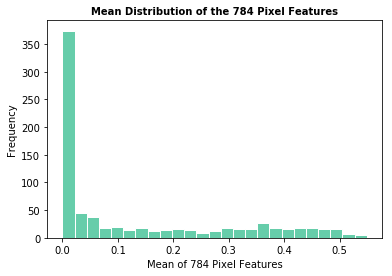

In [22]:
# Determine the binarization / multi-class thresholds through preliminary EDA of the 784 feature values
num_row, num_col = train_data.shape

threshold = []
for i in range(num_col):
    avg = sum(train_data[:,i])/num_row
    threshold.append(avg)
    
print(len(threshold), max(threshold), min(threshold))
    
plt.hist(threshold, edgecolor='white', color='mediumaquamarine', bins = 25)
plt.xlabel("Mean of 784 Pixel Features", size=10)
plt.ylabel("Frequency", size=10)
plt.title('Mean Distribution of the 784 Pixel Features', size=10, weight='bold')

> Based on the above EDA, the binarization threshold to map the pixel values to either 0 or 1 would be set as 0.02. The threshold to map pixel values to 0, 1, or 2 would be set as 0.02, 0.2. 

In [23]:
def P7():

### STUDENT START ###
    # 1. Fit a BernoulliNB model
    # if pixel value < .02 it will be mapped to 0 (white), >= .02, it will be mapped to 1 (black)
    clf = BernoulliNB(binarize=.02)
    bnb = clf.fit(train_data, train_labels)
    bnb_acc = bnb.score(dev_data, dev_labels)
    print('The accuracy of BernoulliNB Naive Bayes estimates: %.3f' %bnb_acc)

    # 2. Fit a MultinomialNB model
    # Define a function that applies the thresholds to turn real valued pixel features into 0/1/2 features.
    # 0 will mean "white", 1 will mean "grey", and 2 will mean "black"
    def multarize_pixel(data, thresholds=[0.02, 0.2]):
        # Initialize a new feature array with the same shape as the original data.
        multarized_data = np.zeros(data.shape)

        # Apply thresholds to each feature.
        row, col = data.shape
        for i in range(row):
            for j in range(col):
                multarized_data[i,j] = 0 if data[i,j] < 0.02 else 1 if data[i,j] < 0.2 else 2
        return multarized_data

    # Create new categorized training and dev data
    multarized_train_data = multarize_pixel(train_data)
    multarized_dev_data = multarize_pixel(dev_data)

    clf = MultinomialNB()
    mnb = clf.fit(multarized_train_data, train_labels)
    mnb_acc = mnb.score(multarized_dev_data, dev_labels)
    print('The accuracy of MultinomialNB Naive Bayes estimates: %.3f' %mnb_acc)
    
### STUDENT END ###

P7()

The accuracy of BernoulliNB Naive Bayes estimates: 0.830
The accuracy of MultinomialNB Naive Bayes estimates: 0.809


> **ANSWER**: Multi-class model does not improve the results, rather the accuracy decreases slightly. This may be caused by: 
- The thresholds set in the MultinomialNB model are not the proper thresholds to map original values to white, grey or black. 
- Binarization of the data is sufficient to capture the effects of whether a pixel is on or off. Adding another class would not improve our predictions and it may skew our predictions towards the grey class. 
- MultinomialNB is overfitting as opposed to BernoulliNB by increasing complexity of the model. Should look at the performance of train data, if it improves all along, while the performance on dev data goes down, it is a classic example of model complexity leading to overfitting.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [24]:
def P8(alphas):

### STUDENT START ###
    # Change alpha = 0 to 1.0e-10 to avoid error
    new_alphas = {'alpha': [value if value >= 0.0000000001 else 0.0000000001 for value in alphas['alpha']]}
    
    # Fit a BernoulliNB model with binarization threshold set as .02
    # if pixel value < .02 it will be mapped to 0 (white), >= .02, it will be mapped to 1 (black)
    clf = BernoulliNB(binarize=.02)
    grid = GridSearchCV(estimator=clf, param_grid=new_alphas, cv=5)
    grid.fit(train_data, train_labels)
    
    # Create a BernoulliNB model with best alpha
    best_alpha = grid.best_estimator_.alpha
    clf_new = BernoulliNB(binarize=.02, alpha=best_alpha)
    bnb_new = clf_new.fit(train_data, train_labels)
    bnb_acc_new = bnb_new.score(dev_data, dev_labels)
    
    # summarize the results of the grid search
    print("The best alpha:", best_alpha)
    print("The best score using training data for evaluation:", grid.best_score_)
    print("The accuracy of Bernoulli NB model with best alpha using dev data for evaluation:", bnb_acc_new)
    
    return grid

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

The best alpha: 1e-10
The best score using training data for evaluation: 0.8347166666666667
The accuracy of Bernoulli NB model with best alpha using dev data for evaluation: 0.832


In [25]:
print(nb.best_params_)

{'alpha': 1e-10}


> **ANSWER**: The minimum alpha allowed by GridSearchCV is 1e-10, which is the best alpha. The accuracy at this alpha is 0.832 (using dev data for testing). This is expected because the purpose of Laplace smoothing is to is to ensure that there are no possible outcomes that aren't included in the training set that result in a probability of 0. Because all of our outcomes are accounted for in the training set, there is no need for a smoothing parameter.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [26]:
def P9():

### STUDENT END ###
    clf = GaussianNB()
    gnb = clf.fit(train_data, train_labels)
    clf_new = GaussianNB(var_smoothing=0.05)
    gnb_new = clf_new.fit(train_data, train_labels) 
    print("The accuracy of GaussianNB model with smoothing variance = 1e-09:", gnb.score(dev_data, dev_labels))
    print("The accuracy of GaussianNB model with smoothing variance = 0.05:", gnb_new.score(dev_data, dev_labels))

#     print("Theta of GaussianNB model with smoothing variance = 1e-09:", gnb.theta_)
#     print("Sigma of GaussianNB model with smoothing variance = 1e-09:", gnb.sigma_)
#     print("Theta of GaussianNB model with smoothing variance = 0.05:", gnb_new.theta_)
#     print("Sigma of GaussianNB model with smoothing variance = 0.05:", gnb_new.sigma_)
    
### STUDENT END ###

gnb = P9()

The accuracy of GaussianNB model with smoothing variance = 1e-09: 0.586
The accuracy of GaussianNB model with smoothing variance = 0.05: 0.814


> **ANSWER**: 
- Because GaussianNB model takes in real and continuously valued features whereas the BernoulliNB model categorizes the continuous features into only two values, the signals taken in by BernoulliNB model are more blurry. This may help improve generalization and accuracy of BernoulliNB model.  
- To achieve similar accuracy as BernoulliNB, the smoothing variance (or, the noise parameter) of GaussianNB should be increased such that the image is more blurry for generalization. 
- in BernoulliNB only has one parameter (a probability of pixel being on/off), whereas in GaussianNB, you have sigma and variance. It means you need to learn two parameters. This is adding complexity to the model. Therefore, by fixing one parameter of GaussianNB to increase the accuracy. Setting var_smoothing to 0.05 is doing this. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

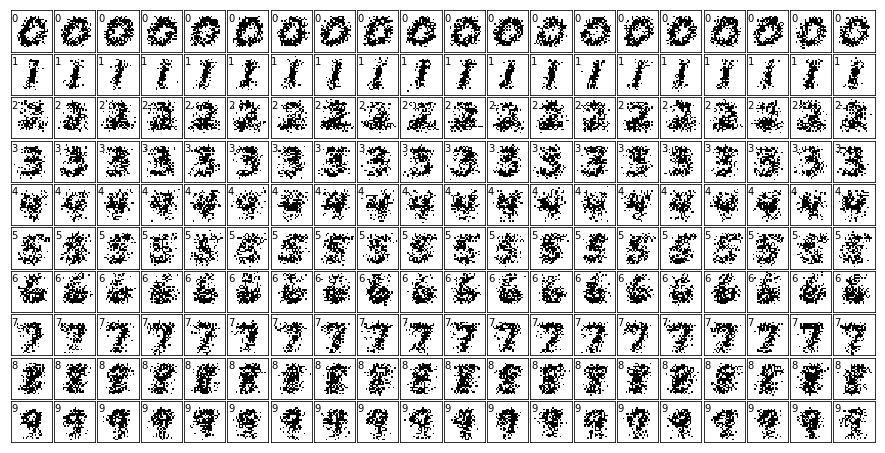

In [27]:
def P10(num_examples):

### STUDENT START ###
    # Fit a BernoulliNB model with binarize = .02, and alpha = 1e-10
    clf = BernoulliNB(binarize=.02, alpha=0.0000000001)
    bnb = clf.fit(train_data, train_labels)
    
    # Adjust figure size and subplots for better presentation
    fig = plt.figure(figsize=(12, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # Generate a 10 by 20 grid with 20 examples of each digit. 
    for i in range(10):
        for j in range(num_examples):
            # Add subplot to display digit image
            ax = fig.add_subplot(10, num_examples, i*num_examples + j + 1, xticks=[], yticks=[])
            # Set pixel value to either 0 or 1
            pixels = np.exp(bnb.feature_log_prob_)[i] > np.random.rand(784)
            # Reshape 784 pixels to 28*28 2D matrix
            ax.imshow(pixels.reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
            # label the image with the target value
            ax.text(0, 7, str(i))    
        
### STUDENT END ###

P10(20)

> **ANSWER**: by comparing above digit image with training data images, we can see that the generated images are much more blurry than the training images. The pixels of 2, 3, 4, 5, 8 and 9 are so spread out that it gets challenging to identify the digit. This is because these images are generated based on the conditional probability of feature given label.  

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [28]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Fit a BernoulliNB model with binarize = .02, and alpha = 1e-10
    clf = BernoulliNB(binarize=.02, alpha=0.0000000001)
    bnb = clf.fit(train_data, train_labels)
    preds = bnb.predict(dev_data)
    
    # Loop through all samples in dev_data
    for i in range(np.shape(dev_data)[0]):
        # Get the posterior probability for each prediction in dev set
        prob = bnb.predict_proba(dev_data[i].reshape(1,-1))
        # Get the maximum posterior and its predicted digit
        max_prob = np.amax(prob)
        pred_digit = np.argmax(prob)
        # Loop through buckets to find the bucket the max posterior falls into
        # Once found the bucket, update correct and total counters in the corresponding index
        for j in range(len(buckets)):
            if max_prob > buckets[j]:
                continue
            else:
                total[j] += 1
                if pred_digit == int(dev_labels[i]):
                    correct[j] += 1
                break
                
    return correct, total

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  32    accuracy = 0.469
p(pred) <= 0.9990000000000    total =  56    accuracy = 0.482
p(pred) <= 0.9999900000000    total =  59    accuracy = 0.576
p(pred) <= 0.9999999000000    total =  50    accuracy = 0.540
p(pred) <= 0.9999999990000    total =  41    accuracy = 0.683
p(pred) <= 0.9999999999900    total =  65    accuracy = 0.708
p(pred) <= 0.9999999999999    total =  62    accuracy = 0.839
p(pred) <= 1.0000000000000    total = 635    accuracy = 0.950


> **ANSWER**: More than half (635 out of 1000) of the predictions fall into (0.9999999999999, 1.0] posterior bucket, with accuracy 0.950. With the increase of posterior, the accuracy increase. We can characterize Naive Bayes model as a weakly calibrated model. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()